## Welcome

## Crdit Card Approval  

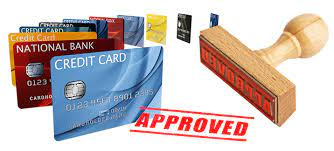

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
application = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
credit = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

In [63]:
print (credit.describe())
print (application.describe())

                 ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00
                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FL

In [64]:
print (len(set(application['ID']))) # how many unique ID in application record?
print (len(set(credit['ID'])) )# how many unique ID in credit record?
print (len(set(application['ID']).intersection(set(credit['ID'])))) # how many IDs do two tables share?

438510
45985
36457


In [65]:
print(application.columns)
print(credit.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')
Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


In [66]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [67]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## Understand dataset (application)

1. **ID:** An identifier for each individual, typically a unique number assigned to each record.

2. **CODE_GENDER:** Gender of the individual (e.g., "M" for male, "F" for female).

3. **FLAG_OWN_CAR:** Indicates whether the individual owns a car (1 for yes, 0 for no).

4. **FLAG_OWN_REALTY:** Indicates whether the individual owns real estate/property (1 for yes, 0 for no).

5. **CNT_CHILDREN:** The count of children the individual has.

6. **AMT_INCOME_TOTAL:** The total annual income of the individual.

7. **NAME_INCOME_TYPE:** The type of income the individual receives (e.g., salary, business, maternity leave).

8. **NAME_EDUCATION_TYPE:** The highest level of education attained by the individual.

9. **NAME_FAMILY_STATUS:** The family status of the individual (e.g., married, single).

10. **NAME_HOUSING_TYPE:** The type of housing the individual lives in (e.g., own apartment, for free).

11. **DAYS_BIRTH:** The age of the individual in days (negative values representing days in the past).

12. **DAYS_EMPLOYED:** The number of days the individual has been employed (negative values representing days in the past). This might be unusual because employment duration is typically positive, so you may need to investigate the dataset or consider the sign convention used.

13. **FLAG_MOBIL:** Indicates whether the individual has a mobile phone (1 for yes, 0 for no).

14. **FLAG_WORK_PHONE:** Indicates whether the individual has a work phone (1 for yes, 0 for no).

15. **FLAG_PHONE:** Indicates whether the individual has a phone (1 for yes, 0 for no).

16. **FLAG_EMAIL:** Indicates whether the individual has an email (1 for yes, 0 for no).

17. **OCCUPATION_TYPE:** The type of occupation the individual is engaged in.

18. **CNT_FAM_MEMBERS:** The count of family members.

## Understand dataset (credit)
1. **ID:** An identifier for each individual, likely a unique number assigned to each record.

2. **MONTHS_BALANCE:** This column probably represents the month of the record in relation to some reference point. It could be a relative month, indicating the number of months before or after a specific event or time. Positive values may represent months after a reference point, while negative values may represent months before.

3. **STATUS:** This column likely contains information about the credit status of the individual for a particular month. The "STATUS" column might include different codes or labels indicating the credit performance or behavior of the individual in that specific month. For example, it could include values like "C" for closed, "D" for overdue, "0" for no DPD (Days Past Due), etc. The exact codes used would depend on the data provider or the system used to record credit status.

## What Business need ????:
#### "The objective of the project is to build a model that predicts whether an individual is eligible for Credit Card Approval or not."

### The frist you should to do EDA to two datasets......

### **Single variable plots**
After looking at the descriptive statistics, we may want to explore our numeric features more. To do this, we like to use single variable plots. These can help us understand the distributions of our data. If our data doesn't follow a normal distribution, we may want to make some transform it so it can be used by specific types of models like linear regresison.

Looking at these charts can also help us to evaluate if there are outliers present in our data.

First, we will look at histograms of our data. These help us to see skew as well as some outliers. I usually do this with every feature (if possible). Try more of these on your own!

Next, we will explore some box plots to see if they tell us additional information

Finally, we will explore some distribution plots for categorical variables.

In [68]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


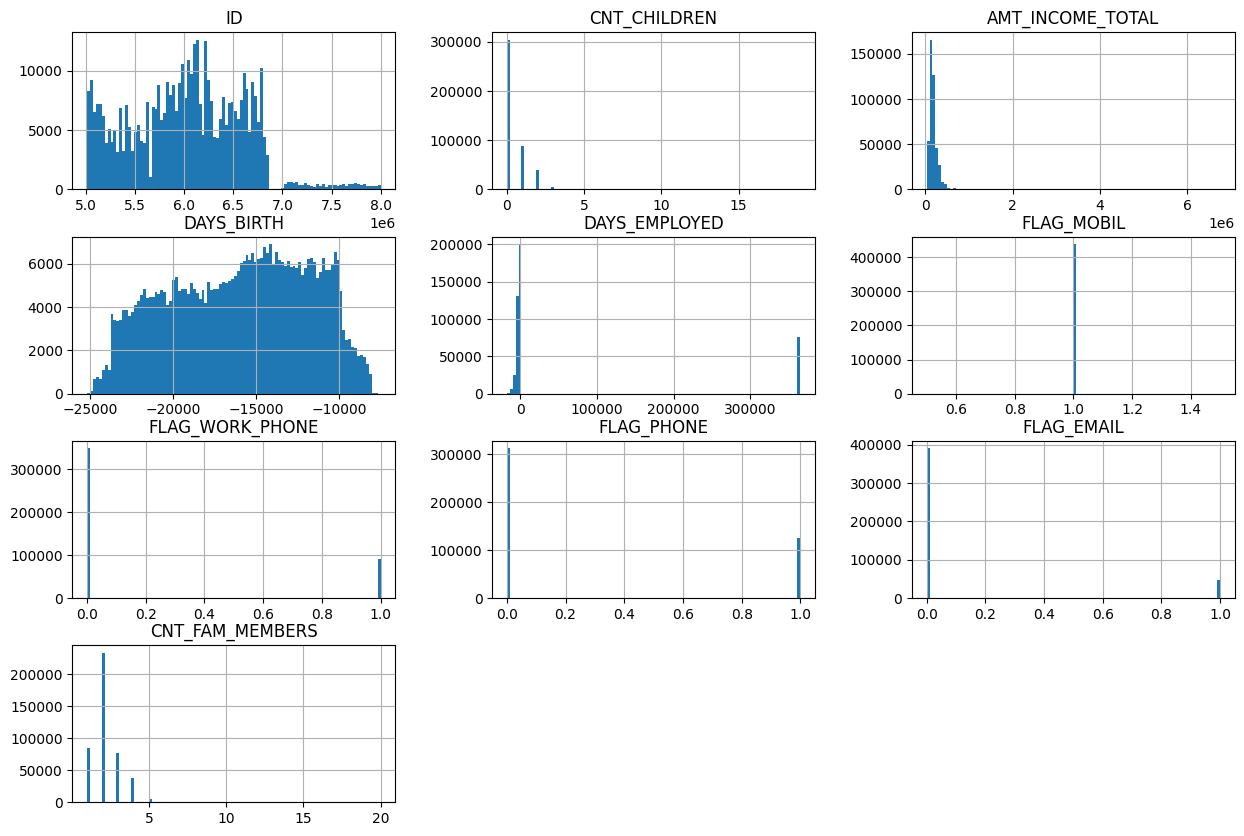

In [69]:
application.hist(bins=100,figsize=(15,10))
plt.show()

In [70]:
application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

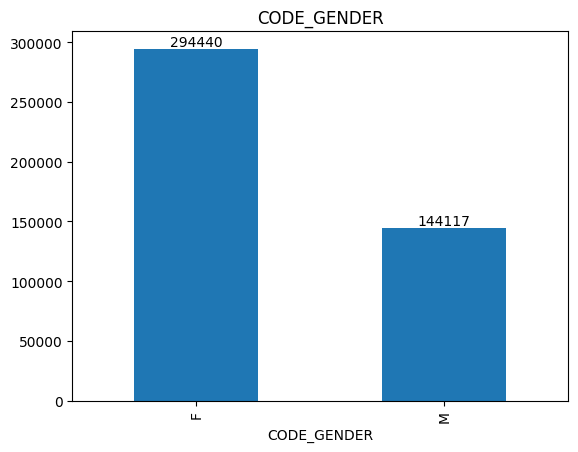

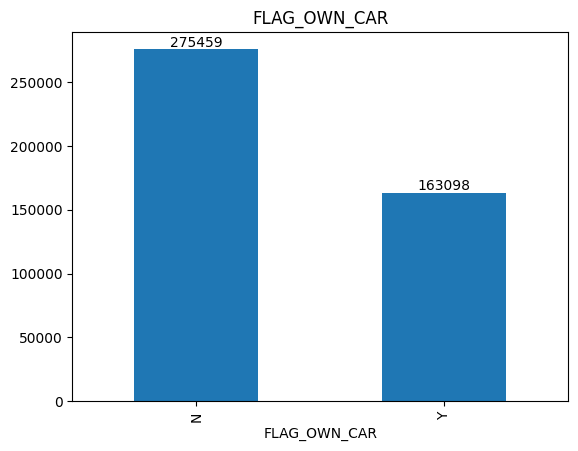

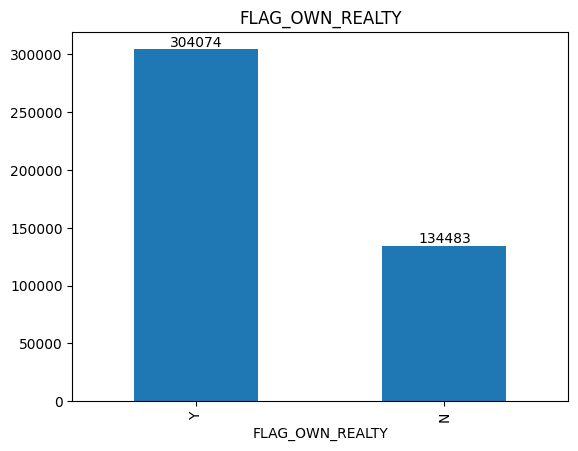

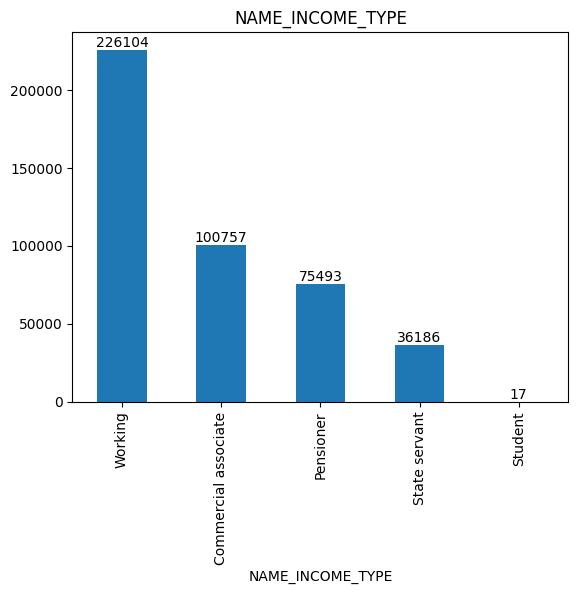

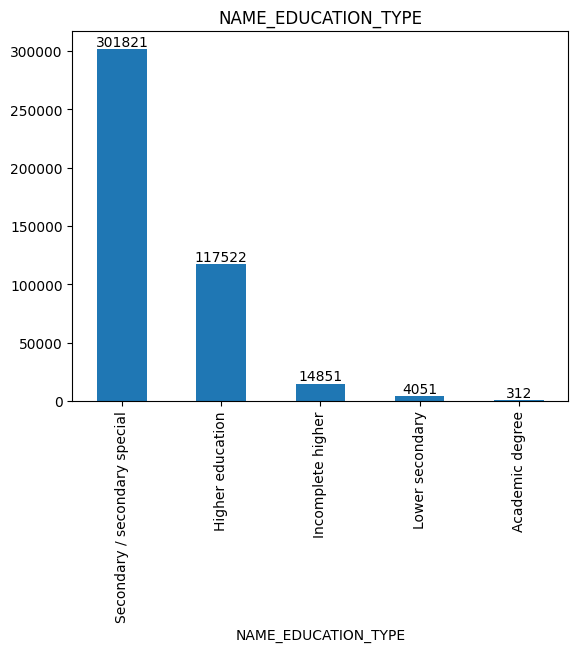

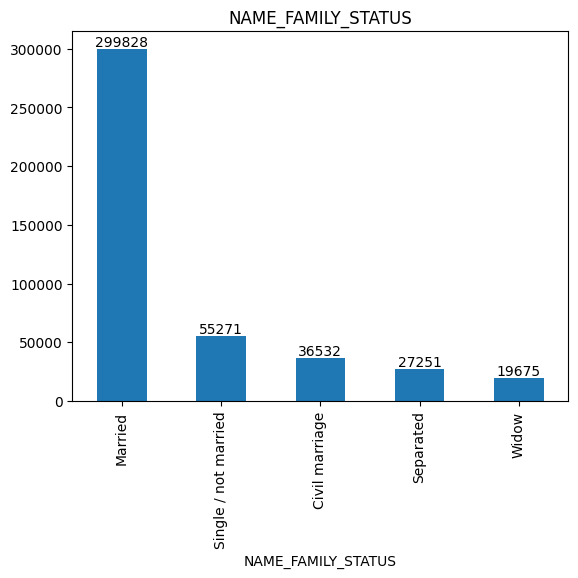

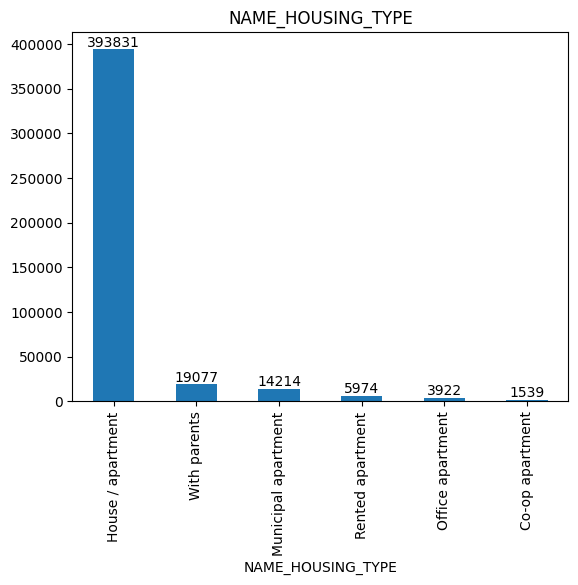

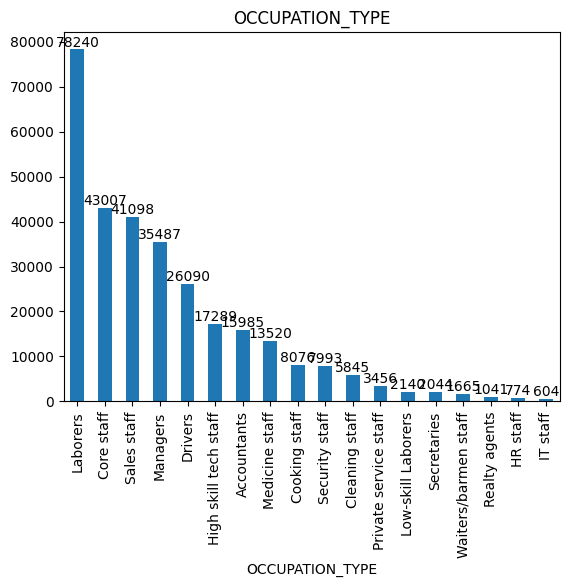

In [71]:
# display all columns have a datatype "object"
import pandas as pd
import matplotlib.pyplot as plt

def display_object(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            ax = value_counts.plot(kind='bar', title=column)
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
            plt.show()

display_object(application)


#### application not have outliers

## **Relationships and Multi-Variable Plots**
A big part of exploratory data analysis is seeing how mutliple variables are related. We can use multiple different types of plots to easily see these relationships. By understanding these relationships we can start to udnerstand which features may be releated or can serve to predict others. In my opinion, this is where buisiness value starts to emerge.

In this part we will explore:

1) Scatter plots

2) Correlation Matrices

3) Pivot Tables

4) Bar Charts

5) Line Charts

In [72]:
application.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

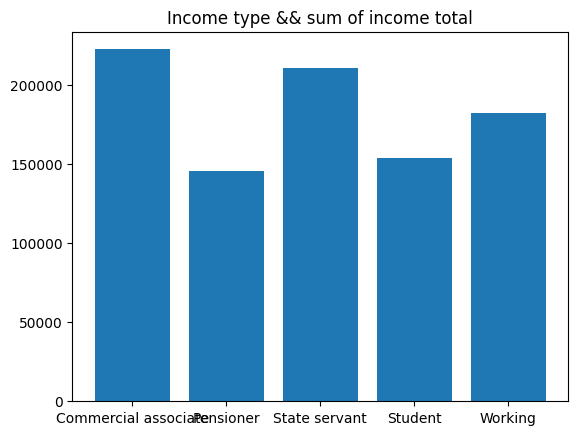

In [73]:
# pd.pivot_table(application,index='NAME_INCOME_TYPE', values ='AMT_INCOME_TOTAL')
x=['Commercial associate','Pensioner','State servant','Student','Working']
y=[222334,145276,210195,153692,182320]
plt.bar(x,y)
plt.title('Income type && sum of income total')
plt.show()


In [74]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


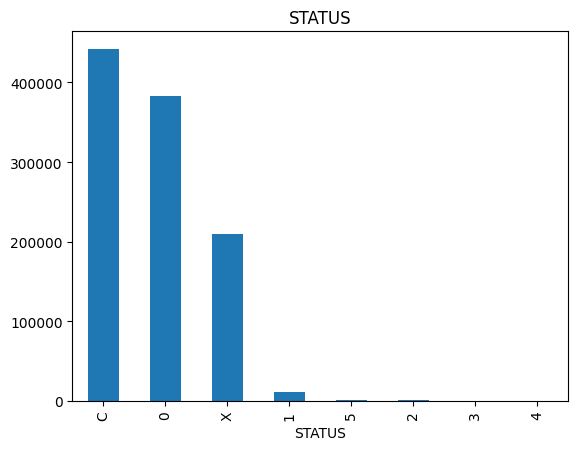

In [75]:
credit['STATUS'].value_counts().plot(kind='bar')
plt.title('STATUS')
plt.show()

## Start in join BY ID

In [76]:
grouped = credit.groupby('ID')

In [77]:
## convert credit data to wide format which every ID is a row
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')

In [78]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [79]:
# Convert 'MONTHS_BALANCE' to numeric type
credit['MONTHS_BALANCE'] = pd.to_numeric(credit['MONTHS_BALANCE'], errors='coerce')

# Calculate 'open_month' using the minimum value of 'MONTHS_BALANCE'
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()

In [80]:
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()  # biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['ID'] = pivot_tb.index

In [81]:
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]

In [82]:
pivot_tb.head()

MONTHS_BALANCE,ID,open_month,end_month
ID,,,
5001711,5001711,-3,0
5001712,5001712,-18,0
5001713,5001713,-21,0
5001714,5001714,-14,0
5001715,5001715,-59,0


In [83]:
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window

In [84]:
pivot_tb.reset_index(drop = True, inplace = True)

In [85]:
credit = pd.merge(credit, pivot_tb, on = 'ID', how = 'left') # join calculated information

In [86]:
credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18


In [87]:
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit0 = credit.copy()
credit0.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
3,5001711,-3,0,-3,0,3,0,0
2,5001711,-2,0,-3,0,3,0,1
1,5001711,-1,0,-3,0,3,0,2
0,5001711,0,X,-3,0,3,0,3
22,5001712,-18,0,-18,0,18,0,0


In [88]:
# count how many users in every m0onth the account was opened
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']})
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']
print(denominator)

    open_month  sta_sum
0          -60      415
1          -59      406
2          -58      440
3          -57      400
4          -56      470
5          -55      486
6          -54      468
7          -53      493
8          -52      553
9          -51      582
10         -50      543
11         -49      553
12         -48      581
13         -47      611
14         -46      575
15         -45      605
16         -44      591
17         -43      649
18         -42      702
19         -41      697
20         -40      737
21         -39      831
22         -38      746
23         -37      720
24         -36      693
25         -35      762
26         -34      744
27         -33      726
28         -32      744
29         -31      748
30         -30      804
31         -29      780
32         -28      806
33         -27      836
34         -26      752
35         -25      863
36         -24      894
37         -23      899
38         -22      865
39         -21      858
40         -20  

In [89]:
credit['application_status'] = credit.groupby('ID')['status'].transform('max')
truncate = credit.loc[credit['application_status']==1,]
not_trunc = credit.loc[credit['application_status']==0,]
print (credit)

              ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
3        5001711              -3      0          -3          0       3   
2        5001711              -2      0          -3          0       3   
1        5001711              -1      0          -3          0       3   
0        5001711               0      X          -3          0       3   
22       5001712             -18      0         -18          0      18   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  application_status  
3             0              0                   0  
2    

In [90]:
import pandas as pd

# Assuming not_trunc and truncate are your DataFrames
dt1 = not_trunc.groupby('ID').agg({
    'month_on_book': ['max'],
    'application_status': ['max']
})
dt1.reset_index(inplace=True)
dt1.columns = ['ID', 'month_on_book', 'application_status']

dt2 = truncate.loc[truncate['status'] == 1].groupby('ID').agg({
    'month_on_book': ['min'],
    'application_status': ['max']
})
dt2.reset_index(inplace=True)
dt2.columns = ['ID', 'month_on_book', 'application_status']

# Concatenate dt1 and dt2 vertically
dt = pd.concat([dt1, dt2], ignore_index=True)

print(dt)

            ID  month_on_book  application_status
0      5001711              3                   0
1      5001712             18                   0
2      5001713             21                   0
3      5001714             14                   0
4      5001715             59                   0
...        ...            ...                 ...
45980  5149834              8                   1
45981  5149838              8                   1
45982  5150049              9                   1
45983  5150238             48                   1
45984  5150337              3                   1

[45985 rows x 3 columns]


In [91]:
dt = pd.merge(dt, application, on = 'ID', how = 'left')
dt.fillna('unknown',inplace=True)
pd.options.display.max_rows = 999
print(dt)

            ID  month_on_book  application_status CODE_GENDER FLAG_OWN_CAR  \
0      5001711              3                   0     unknown      unknown   
1      5001712             18                   0     unknown      unknown   
2      5001713             21                   0     unknown      unknown   
3      5001714             14                   0     unknown      unknown   
4      5001715             59                   0     unknown      unknown   
...        ...            ...                 ...         ...          ...   
45980  5149834              8                   1           F            N   
45981  5149838              8                   1           F            N   
45982  5150049              9                   1           F            N   
45983  5150238             48                   1           F            Y   
45984  5150337              3                   1           M            N   

      FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL      NAME_I

/tmp/ipykernel_34/1440047925.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dt.fillna('unknown',inplace=True)


In [92]:
dt.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result2.csv')


In [93]:
dt.columns

Index(['ID', 'month_on_book', 'application_status', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS'],
      dtype='object')

In [94]:
cc_apps_description = dt.describe()
print(cc_apps_description)

                 ID  month_on_book  application_status
count  4.598500e+04   45985.000000        45985.000000
mean   5.070164e+06      21.467805            0.014505
std    4.543364e+04      15.400588            0.119560
min    5.001711e+06       0.000000            0.000000
25%    5.026147e+06       9.000000            0.000000
50%    5.065737e+06      18.000000            0.000000
75%    5.114024e+06      32.000000            0.000000
max    5.150487e+06      60.000000            1.000000


In [95]:
dt.dtypes

ID                      int64
month_on_book           int64
application_status       int8
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN           object
AMT_INCOME_TOTAL       object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
DAYS_BIRTH             object
DAYS_EMPLOYED          object
FLAG_MOBIL             object
FLAG_WORK_PHONE        object
FLAG_PHONE             object
FLAG_EMAIL             object
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS        object
dtype: object

In [96]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   45985 non-null  int64 
 1   month_on_book        45985 non-null  int64 
 2   application_status   45985 non-null  int8  
 3   CODE_GENDER          45985 non-null  object
 4   FLAG_OWN_CAR         45985 non-null  object
 5   FLAG_OWN_REALTY      45985 non-null  object
 6   CNT_CHILDREN         45985 non-null  object
 7   AMT_INCOME_TOTAL     45985 non-null  object
 8   NAME_INCOME_TYPE     45985 non-null  object
 9   NAME_EDUCATION_TYPE  45985 non-null  object
 10  NAME_FAMILY_STATUS   45985 non-null  object
 11  NAME_HOUSING_TYPE    45985 non-null  object
 12  DAYS_BIRTH           45985 non-null  object
 13  DAYS_EMPLOYED        45985 non-null  object
 14  FLAG_MOBIL           45985 non-null  object
 15  FLAG_WORK_PHONE      45985 non-null  object
 16  FLAG

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'month_on_book'}>],
       [<Axes: title={'center': 'application_status'}>, <Axes: >]],
      dtype=object)

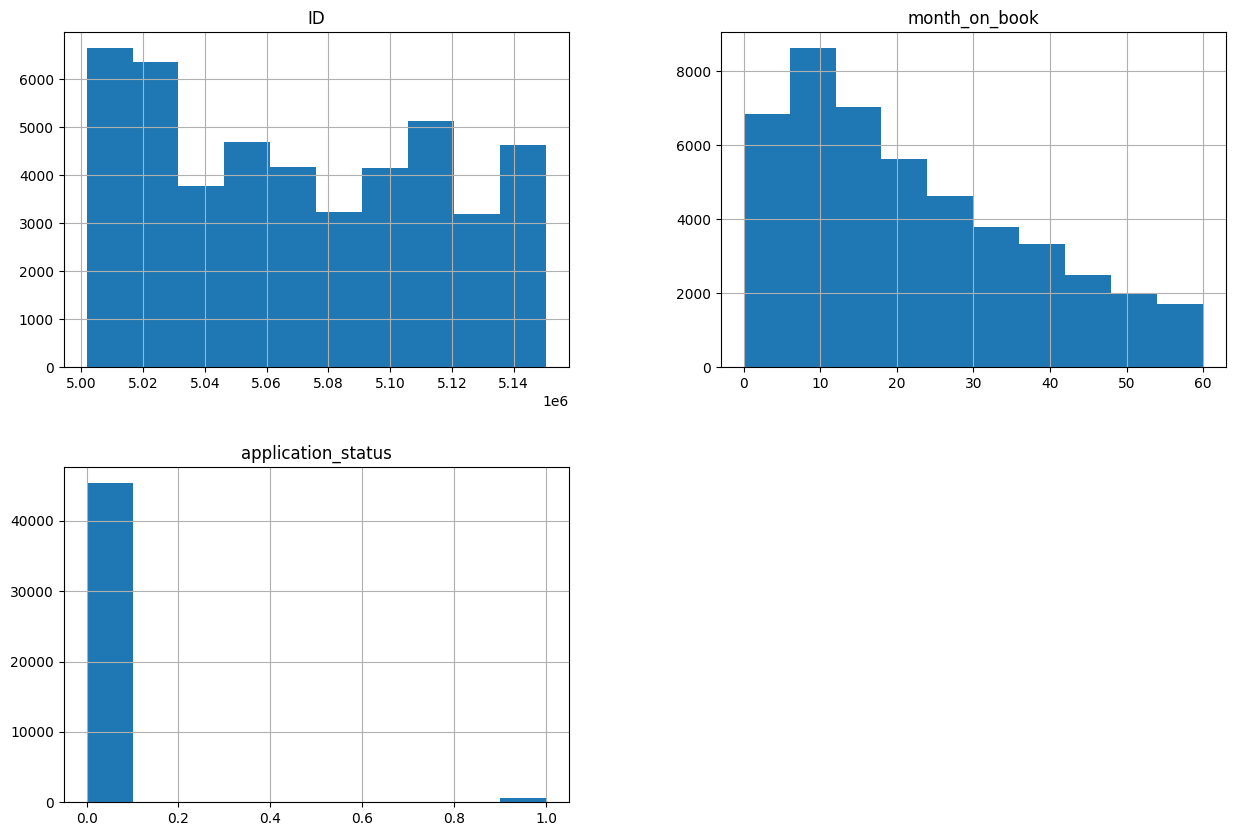

In [97]:
dt.hist(figsize=(15,10))

In [98]:
# # # Handling the missing values in  dataset----------------
# Replace the 'unknown's with NaN
cc_apps = dt.replace('unknown', np.nan)
cc_apps.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result3.csv')
credit_app = pd.read_csv(r'C:\Users\youssef azam\Desktop\project for ml\result3.csv')
# print (credit_app)
# print (credit_app.describe())
credit_app.info()

/tmp/ipykernel_34/1190001245.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cc_apps = dt.replace('unknown', np.nan)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45985 non-null  int64  
 1   ID                   45985 non-null  int64  
 2   month_on_book        45985 non-null  int64  
 3   application_status   45985 non-null  int64  
 4   CODE_GENDER          36457 non-null  object 
 5   FLAG_OWN_CAR         36457 non-null  object 
 6   FLAG_OWN_REALTY      36457 non-null  object 
 7   CNT_CHILDREN         36457 non-null  float64
 8   AMT_INCOME_TOTAL     36457 non-null  float64
 9   NAME_INCOME_TYPE     36457 non-null  object 
 10  NAME_EDUCATION_TYPE  36457 non-null  object 
 11  NAME_FAMILY_STATUS   36457 non-null  object 
 12  NAME_HOUSING_TYPE    36457 non-null  object 
 13  DAYS_BIRTH           36457 non-null  float64
 14  DAYS_EMPLOYED        36457 non-null  float64
 15  FLAG_MOBIL           36457 non-null 

In [99]:
# # Impute the missing values with mean imputation
# credit_app.fillna(credit_app.mean(), inplace=True)
# credit_app = credit_app.fillna(credit_app.mode().iloc[0])
# print (credit_app)
# credit_app.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result6.csv')

In [100]:
# #  Preprocessing the data--------
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Convert the non-numeric data into numeric--------
# Iterate over all the values of each column and extract their dtypes
for col in credit_app.columns:
    # Compare if the dtype is object
    if credit_app[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        credit_app[col]=le.fit_transform(credit_app[col])

print(credit_app.info())
credit_app.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result5.csv')
credit_processing  = pd.read_csv(r'C:\Users\youssef azam\Desktop\project for ml\result5.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45985 non-null  int64  
 1   ID                   45985 non-null  int64  
 2   month_on_book        45985 non-null  int64  
 3   application_status   45985 non-null  int64  
 4   CODE_GENDER          45985 non-null  int64  
 5   FLAG_OWN_CAR         45985 non-null  int64  
 6   FLAG_OWN_REALTY      45985 non-null  int64  
 7   CNT_CHILDREN         36457 non-null  float64
 8   AMT_INCOME_TOTAL     36457 non-null  float64
 9   NAME_INCOME_TYPE     45985 non-null  int64  
 10  NAME_EDUCATION_TYPE  45985 non-null  int64  
 11  NAME_FAMILY_STATUS   45985 non-null  int64  
 12  NAME_HOUSING_TYPE    45985 non-null  int64  
 13  DAYS_BIRTH           36457 non-null  float64
 14  DAYS_EMPLOYED        36457 non-null  float64
 15  FLAG_MOBIL           36457 non-null 

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

# Load the data
credit_app = pd.read_csv(r'C:\Users\youssef azam\Desktop\project for ml\result3.csv')

In [102]:
# Replace 'unknown' values with NaN
credit_app.replace('unknown', np.nan, inplace=True)

# Drop unnecessary columns
credit_app = credit_app.drop(columns=["ID", "CNT_CHILDREN", "NAME_HOUSING_TYPE", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])

In [103]:
# Reorder columns for clarity
column_names = ["month_on_book", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "AMT_INCOME_TOTAL",
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "DAYS_BIRTH", "DAYS_EMPLOYED",
                "FLAG_MOBIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "application_status"]
credit_app = credit_app.reindex(columns=column_names)

In [104]:
credit_app.head(3)

,month_on_book,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,application_status
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


application_status
0    45318
1      667
Name: count, dtype: int64


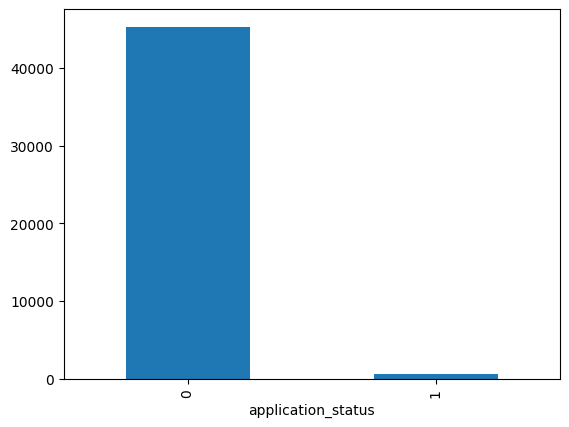

In [105]:
credit_app['application_status'].value_counts().plot(kind='bar')
print(credit_app['application_status'].value_counts())

In [106]:
# Convert non-numeric data into numeric using LabelEncoder
le = LabelEncoder()
for col in credit_app.columns:
    if credit_app[col].dtype == 'object':
        credit_app[col] = le.fit_transform(credit_app[col])

# Save the preprocessed data
credit_app.to_csv(r'C:\Users\DELL\Desktop\credit card project\result5.csv')

In [107]:
# Separate features and target
X, y = credit_app.iloc[:, :-1], credit_app.iloc[:, -1]

# Handle missing values (NaN) - You can customize this based on your preference
X.fillna(X.mean(), inplace=True)

In [108]:
# Create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=42)

# Concatenate the resampled data with the majority class
X_balanced = pd.concat([X[y == 0], X_resampled])
y_balanced = pd.concat([y[y == 0], y_resampled])

In [109]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [110]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
# Fit a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [112]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

In [113]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [114]:
print("Accuracy of logistic regression classifier:", accuracy)

Accuracy of logistic regression classifier: 0.6877758164165931


In [115]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5479 3647]
 [2013 6989]]


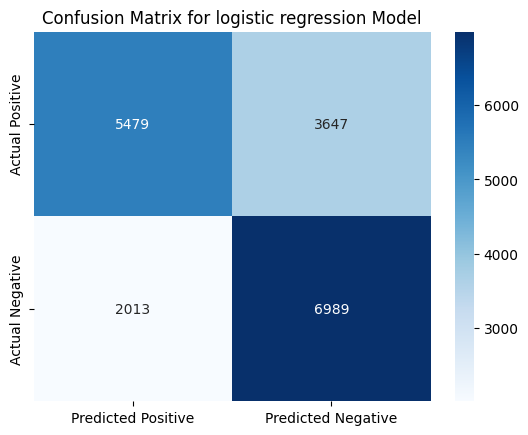

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your confusion matrix
conf_matrix = conf_matrix

# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for logistic regression Model')
plt.show()


In [117]:
# Instantiate Random Forest classifier
random_f = RandomForestClassifier(random_state=42)

In [118]:
random_f.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [119]:
# Make predictions on the test set
y_pred_rf = random_f.predict(X_test_scaled)

In [121]:
print("Training Score:",random_f.score(X_train_scaled,y_train)*100,'%')

Training Score: 97.0872179621559 %


In [122]:
print("Testing Score:",random_f.score(X_test_scaled,y_test)*100,'%')

Testing Score: 97.07082965578111 %


In [123]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Accuracy of Random Forest classifier: 0.9707082965578111
Confusion Matrix for Random Forest:
[[8881  245]
 [ 286 8716]]


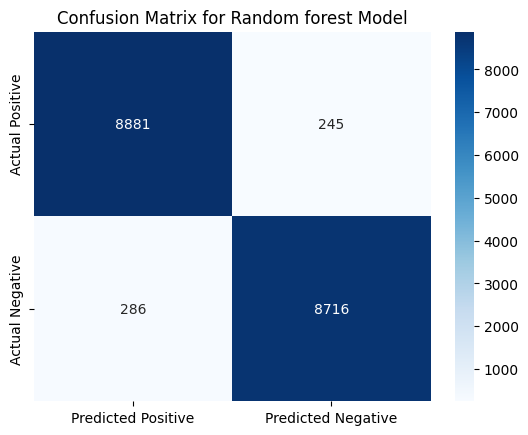

In [124]:
# Your confusion matrix
conf_matrix = conf_matrix_rf

conf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random forest Model')
plt.show()

![](https://blog.getcompass.ai/content/images/size/w1384/2023/07/Best-Appreciation-Thank-You-Message.webp)